## Extract data from optic setup

In [1]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import requests
from dotenv import dotenv_values

#### Data from first type of analisys without the new program

In [13]:
# Open '.tsv' file
with open('G:\Otros ordenadores\PC Línea Metano\Espectros/C3_CO2_50%HR_Led365A.tsv', 'r') as file:
    # Perform operations on the file
    content1 = file.read()
    #print(content)

In [24]:
# Convert data to dataframe
df_optic1 = pd.read_csv(StringIO(content1), delimiter='\t')

# Extract the info of the experiment lab in the 'info_df'
info_df = df_optic1.iloc[1:8, :2]   # Extract only the columns with information of the experiment
new_column_names = ['dark_info', 'reference_info']   # Change the name of columns
info_df.columns = new_column_names
info_df

# Extract the data of the experiment lab in the 'info_df'
numeric_df = df_optic1.iloc[9:, :2]   # Extract only the columns with information of the experiment
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce').reset_index(drop=True)   # Transform the columns to numeric and if the result of operation is wrong, I will remove this data
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Dark       2067 non-null   int64
 1   Reference  2067 non-null   int64
dtypes: int64(2)
memory usage: 32.4 KB


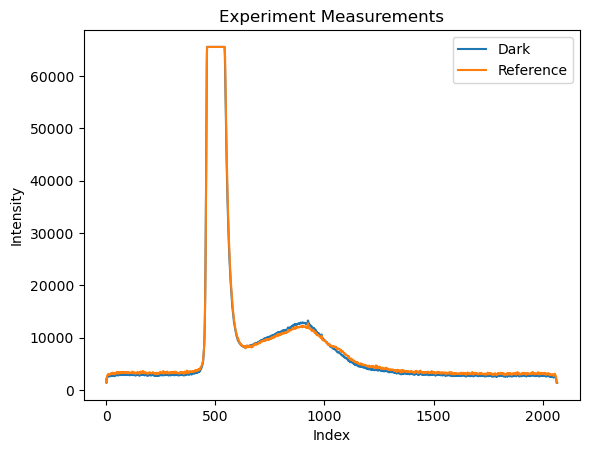

In [31]:
# Plot the graphic
numeric_df.plot(kind='line', xlabel='Index', ylabel='Intensity', title='Experiment Measurements', legend=True)
plt.show()

#### Data from second type of analisys with the new program

In [10]:
# Open '.txt' file
with open('G:\Otros ordenadores\PC Línea Metano\Espectros/HDX016921__0__10-17-50-945.txt', 'r') as file:
    # Perform operations on the file
    content2 = file.read()
    #print(content2)

In [23]:
# Convert data to dataframe
#df_optic2 = pd.read_csv(StringIO(content2), delimiter=',')
data = StringIO(content2)

# Read the data into a DataFrame
df_optic2 = pd.read_csv(data, sep='\t', skiprows=14, header=None)
# Traspose the dataframe
df_optic2 = df_optic2.transpose()
# Change the dataframe name columns
df_optic2.columns = df_optic2.iloc[0]
# Remove first row with names. Reset the index and remove the old index
df_optic2 = df_optic2.drop(0).reset_index(drop=True)
# Change the first column name 
df_optic2.columns.values[0] = 'wavelength_nm'

df_optic2

,wavelength_nm,2023-10-30 10:17:51.045003,2023-10-30 10:17:51.545003,2023-10-30 10:17:52.045003,2023-10-30 10:17:52.545003,2023-10-30 10:17:53.045003,2023-10-30 10:17:53.545003,2023-10-30 10:17:54.045003,2023-10-30 10:17:54.545003,2023-10-30 10:17:55.045003,...,2023-10-30 10:18:03.045003,2023-10-30 10:18:03.545003,2023-10-30 10:18:04.045003,2023-10-30 10:18:04.545003,2023-10-30 10:18:05.045003,2023-10-30 10:18:05.545003,2023-10-30 10:18:06.045003,2023-10-30 10:18:06.545003,2023-10-30 10:18:07.045003,2023-10-30 10:18:07.545003
0,NaN,1895.0,1893.0,1891.0,1901.0,1893.0,1900.0,1891.0,1902.0,1898.0,...,1907.0,1900.0,1890.0,1895.0,1890.0,1902.0,1902.0,1889.0,1902.0,1897.0
1,"194,638",1343,1341,1340,1341,1339,1335,1335,1347,1343,...,1343,1341,1349,1336,1337,1344,1342,1342,1347,1349
2,"195,012",1413,1403,1409,1409,1404,1421,1411,1413,1409,...,1406,1406,1409,1417,1409,1410,1408,1416,1410,1422
3,"195,386",1393,1393,1397,1401,1393,1404,1397,1406,1395,...,1398,1395,1392,1390,1395,1392,1390,1403,1401,1402
4,"195,759",1879,1920,1915,1932,1927,1931,1899,1926,1938,...,1915,1907,1903,1902,1896,1909,1926,1946,1911,1888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,"808,342",1395,1391,1394,1390,1398,1393,1405,1400,1402,...,1393,1393,1394,1400,1394,1403,1386,1400,1391,1407
2065,"808,574",1411,1410,1403,1391,1401,1401,1401,1409,1408,...,1400,1396,1404,1401,1402,1400,1398,1395,1402,1414
2066,"808,807",1413,1404,1407,1402,1402,1399,1403,1406,1401,...,1407,1395,1411,1408,1401,1406,1398,1395,1406,1410
2067,"809,039",1403,1397,1403,1394,1398,1396,1407,1397,1402,...,1399,1410,1404,1401,1408,1399,1397,1401,1406,1406


In [5]:
'''
# Use StringIO to simulate a file-like object
metadata_data = StringIO(content2)

# Create an empty DataFrame for metadata
metadata_df = pd.DataFrame(columns=['Parameter', 'Value'])

# Read the metadata into the DataFrame
for line in metadata_data:
    # Split each line into parameter and value
    parts = line.strip().split(':')
    
    # Add the data to the DataFrame
    if len(parts) == 2:
        parameter = parts[0].strip()
        value = parts[1].strip()
        metadata_df = metadata_df.append({'Parameter': parameter, 'Value': value}, ignore_index=True)

# Display the metadata DataFrame
print(metadata_df)
'''

"\n# Use StringIO to simulate a file-like object\nmetadata_data = StringIO(content2)\n\n# Create an empty DataFrame for metadata\nmetadata_df = pd.DataFrame(columns=['Parameter', 'Value'])\n\n# Read the metadata into the DataFrame\nfor line in metadata_data:\n    # Split each line into parameter and value\n    parts = line.strip().split(':')\n    \n    # Add the data to the DataFrame\n    if len(parts) == 2:\n        parameter = parts[0].strip()\n        value = parts[1].strip()\n        metadata_df = metadata_df.append({'Parameter': parameter, 'Value': value}, ignore_index=True)\n\n# Display the metadata DataFrame\nprint(metadata_df)\n"

In [27]:
# Concat two dataframe previous to print the result
df_concat = pd.concat([df_optic2.iloc[1:,0], numeric_df], axis=1)
df_concat['wavelength_nm'] = df_concat['wavelength_nm'].str.replace(',', '.').astype(float)
df_concat

,wavelength_nm,Dark,Reference
1,194.638,1382.0,1403.0
2,195.012,1729.0,1853.0
3,195.386,2048.0,2266.0
4,195.759,2405.0,2728.0
5,196.133,2433.0,2774.0
...,...,...,...
2065,808.574,1400.0,1422.0
2066,808.807,1397.0,1424.0
2067,809.039,NaN,NaN
2068,809.272,NaN,NaN


In [18]:
df_concat.head(50)
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2074 entries, 2 to 2075
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   nan        2068 non-null   object 
 1   Dark       2067 non-null   float64
 2   Reference  2067 non-null   float64
dtypes: float64(2), object(1)
memory usage: 64.8+ KB


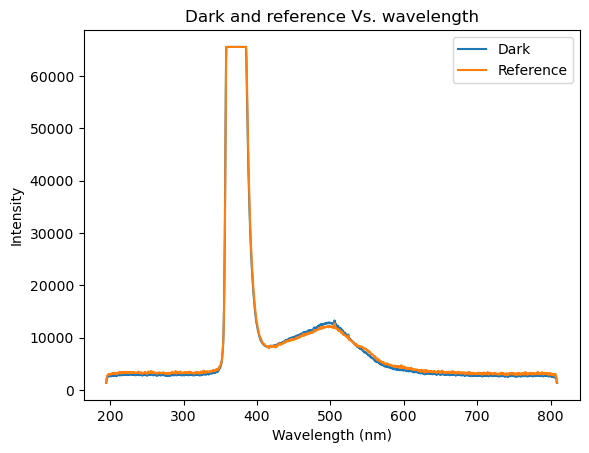

In [30]:
# Plot the graphic
plt.plot(df_concat['wavelength_nm'], df_concat['Dark'], label='Dark')
plt.plot(df_concat['wavelength_nm'], df_concat['Reference'], label='Reference')

# Etiquetas y título
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title('Dark and reference Vs. wavelength')
plt.legend()

# Mostrar el gráfico
plt.show()

In [32]:
# Store the data in a csv file
df_concat.to_csv('../data/graphic_congress.csv', index=False)